# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import numpy as np
import pandas as pd

In [2]:
from scipy.stats.stats import pearsonr

In [3]:
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [4]:
data = pd.read_csv('orange_small_churn_data.train')
labels = pd.read_csv('orange_small_churn_labels.train', header=None)

In [5]:
data.head(5)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


In [6]:
data.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,570.000000,1006.000000,1005.000000,1275.000000,1.165000e+03,35565.000000,35560.000000,0.0,570.000000,1.165000e+03,...,1.006000e+03,1006.000000,0.0,570.000000,570.00000,1006.000000,16785.000000,266.000000,0.0,0.0
mean,11.003509,0.004970,429.328358,0.148235,2.490555e+05,1319.915394,6.792126,NaN,47.487719,3.813466e+05,...,8.067657e+04,7.419483,NaN,3.515789,16.05614,165.108310,270.585523,22637.159019,NaN,NaN
std,34.952792,0.157642,4470.405915,1.396054,6.762021e+05,2609.955770,6.287285,NaN,147.137816,9.353348e+05,...,2.141650e+05,34.642351,NaN,9.412473,54.96505,113.400173,86.723561,30843.320634,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2419.965000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,196.410000,270.000000,12612.240000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.172150e+05,1435.000000,7.000000,NaN,46.000000,2.419740e+05,...,4.260950e+04,8.000000,NaN,6.000000,14.00000,250.980000,330.000000,32209.560000,NaN,NaN
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,35.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1000.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [7]:
labels.head(5)

,0
0,-1
1,-1
2,-1
3,1
4,-1


In [8]:
print ( data.shape, labels.shape )

(40000, 230) (40000, 1)


2\. Рассчитайте доли классов `отток` и `не отток`.

In [9]:
print (len(labels[labels.values == 1]),'/', len(labels[labels.values == -1]))

2976 / 37024


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [10]:
data_full = data
data_full['target'] = labels

In [11]:
data_nomer = data_full.drop(columns=['Var190', "Var191", 'Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199',
                     'Var200', 'Var201', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var209',
                       'Var210', 'Var211', 'Var212', 'Var213', 'Var214', 'Var215', 'Var216', 'Var217', 'Var218', 'Var219',
                       'Var220', 'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229',
                       'Var230',])

In [12]:
data_full.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,target
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


In [13]:
data_full.corr(method='kendall')

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230,target
Var1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.534440,NaN,...,NaN,NaN,0.028509,0.374546,NaN,-0.144182,NaN,NaN,NaN,0.046096
Var2,NaN,1.000000,0.048960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.057258,NaN,NaN,NaN,0.019216,-0.067869,NaN,NaN,NaN,-0.006502
Var3,NaN,0.048960,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.354703,NaN,NaN,NaN,0.347955,-0.125706,NaN,NaN,NaN,0.091195
Var4,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.041743,NaN,NaN,NaN,0.008887
Var5,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.487324,...,NaN,NaN,NaN,NaN,NaN,-0.037069,0.176507,NaN,NaN,-0.017097
Var6,NaN,NaN,NaN,NaN,NaN,1.000000,0.381261,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.066729,NaN,NaN,NaN,-0.043527
Var7,NaN,NaN,NaN,NaN,NaN,0.381261,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.088413,NaN,NaN,NaN,-0.076101
Var8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Var9,0.534440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,0.039978,0.719446,NaN,-0.070033,NaN,NaN,NaN,0.053960
Var10,NaN,NaN,NaN,NaN,0.487324,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-0.005776,0.132633,NaN,NaN,-0.014561


In [14]:
data_correlation = data_nomer.corr(method='kendall')

In [15]:
type(data_nomer['Var7'][1])

numpy.float64

In [16]:
data_correlation_filna = data_correlation.fillna(0)

In [17]:
data_correlation_filna

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,target
Var1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.534440,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.028509,0.374546,0.000000,-0.144182,0.046096
Var2,0.000000,1.000000,0.048960,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.047036,0.057258,0.0,0.000000,0.000000,0.019216,-0.067869,-0.006502
Var3,0.000000,0.048960,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.334867,0.354703,0.0,0.000000,0.000000,0.347955,-0.125706,0.091195
Var4,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.065622,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.041743,0.008887
Var5,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.487324,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.037069,-0.017097
Var6,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.381261,0.0,0.000000,0.000000,...,-0.071384,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.066729,-0.043527
Var7,0.000000,0.000000,0.000000,0.000000,0.000000,0.381261,1.000000,0.0,0.000000,0.000000,...,-0.073957,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.088413,-0.076101
Var8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Var9,0.534440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.039978,0.719446,0.000000,-0.070033,0.053960
Var10,0.000000,0.000000,0.000000,0.000000,0.487324,0.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.005776,-0.014561


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [18]:
corr = data_correlation.sort_values(by = 'target', ascending = False)['target'][1:21]

In [19]:
corr.keys()

Index(['Var53', 'Var3', 'Var188', 'Var129', 'Var19', 'Var183', 'Var41',
       'Var98', 'Var170', 'Var126', 'Var40', 'Var12', 'Var68', 'Var66',
       'Var156', 'Var62', 'Var9', 'Var177', 'Var184', 'Var114'],
      dtype='object')

In [20]:
data_top_corr = pd.DataFrame(data_nomer['Var53'])

In [21]:
for i in corr.keys()[1:]:
    data_top_corr[str(i)] = data_nomer[str(i)]

In [22]:
data_top_corr['target'] = data_nomer['target']

In [23]:
data_top_corr.head(5)

,Var53,Var3,Var188,Var129,Var19,Var183,Var41,Var98,Var170,Var126,...,Var12,Var68,Var66,Var156,Var62,Var9,Var177,Var184,Var114,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


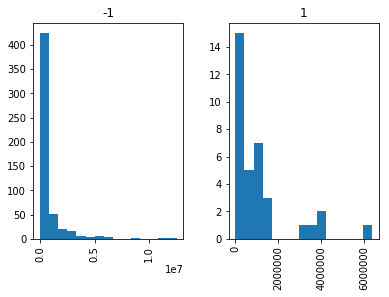

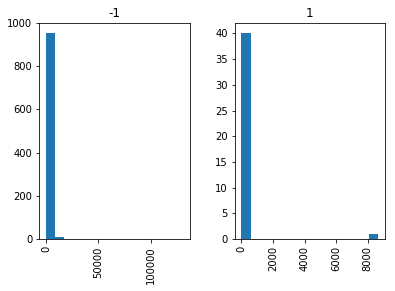

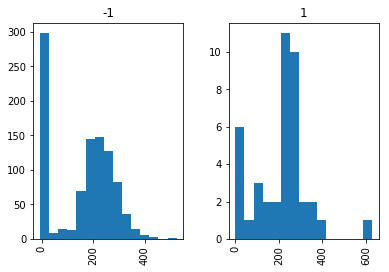

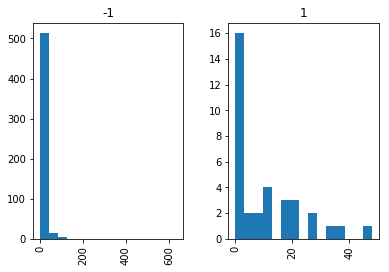

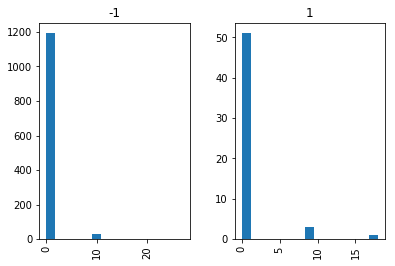

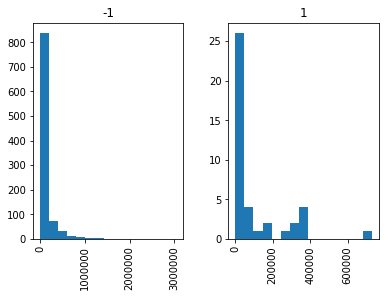

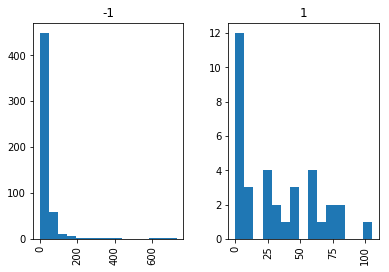

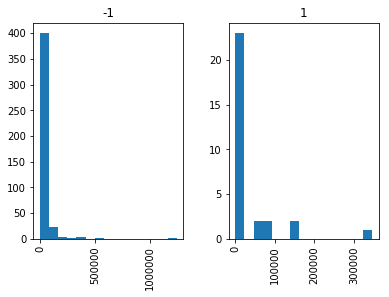

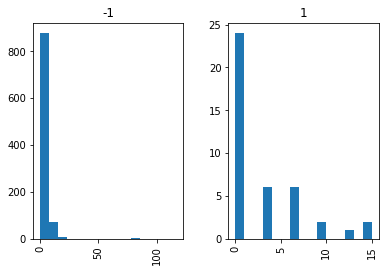

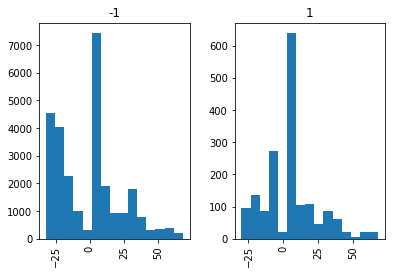

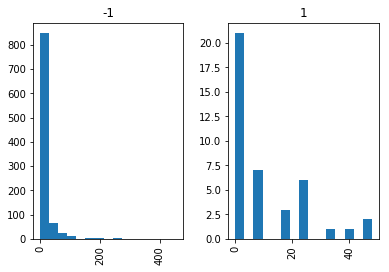

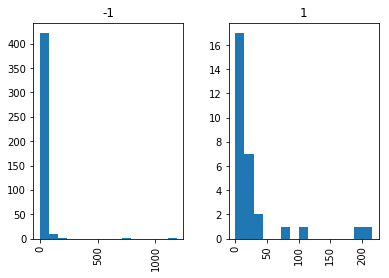

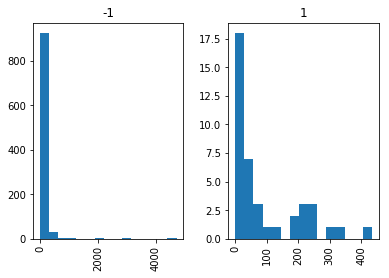

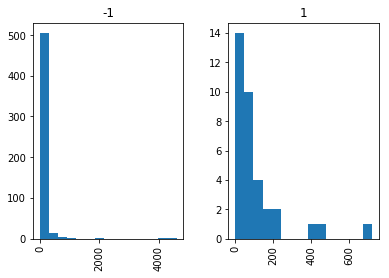

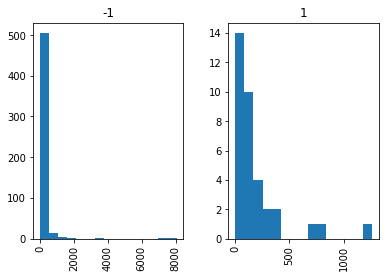

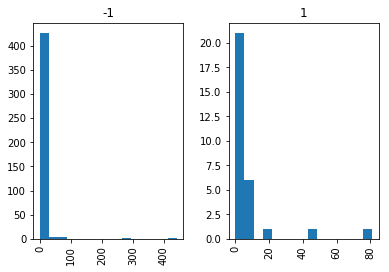

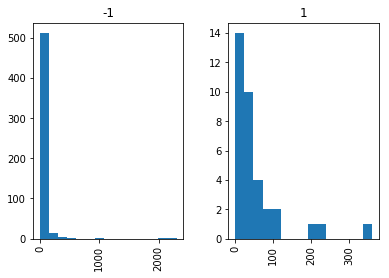

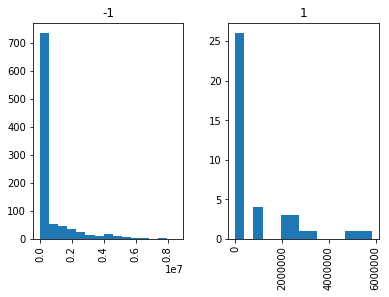

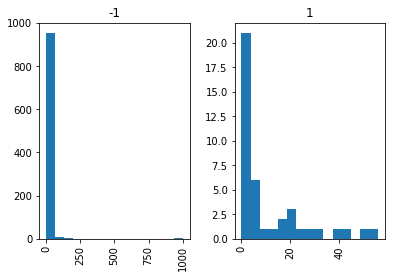

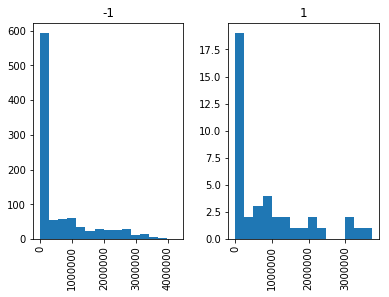

In [24]:
for i in corr.keys():
    data_nomer[str(i)].hist(by=data_nomer['target'], bins=15)
    plt.show()

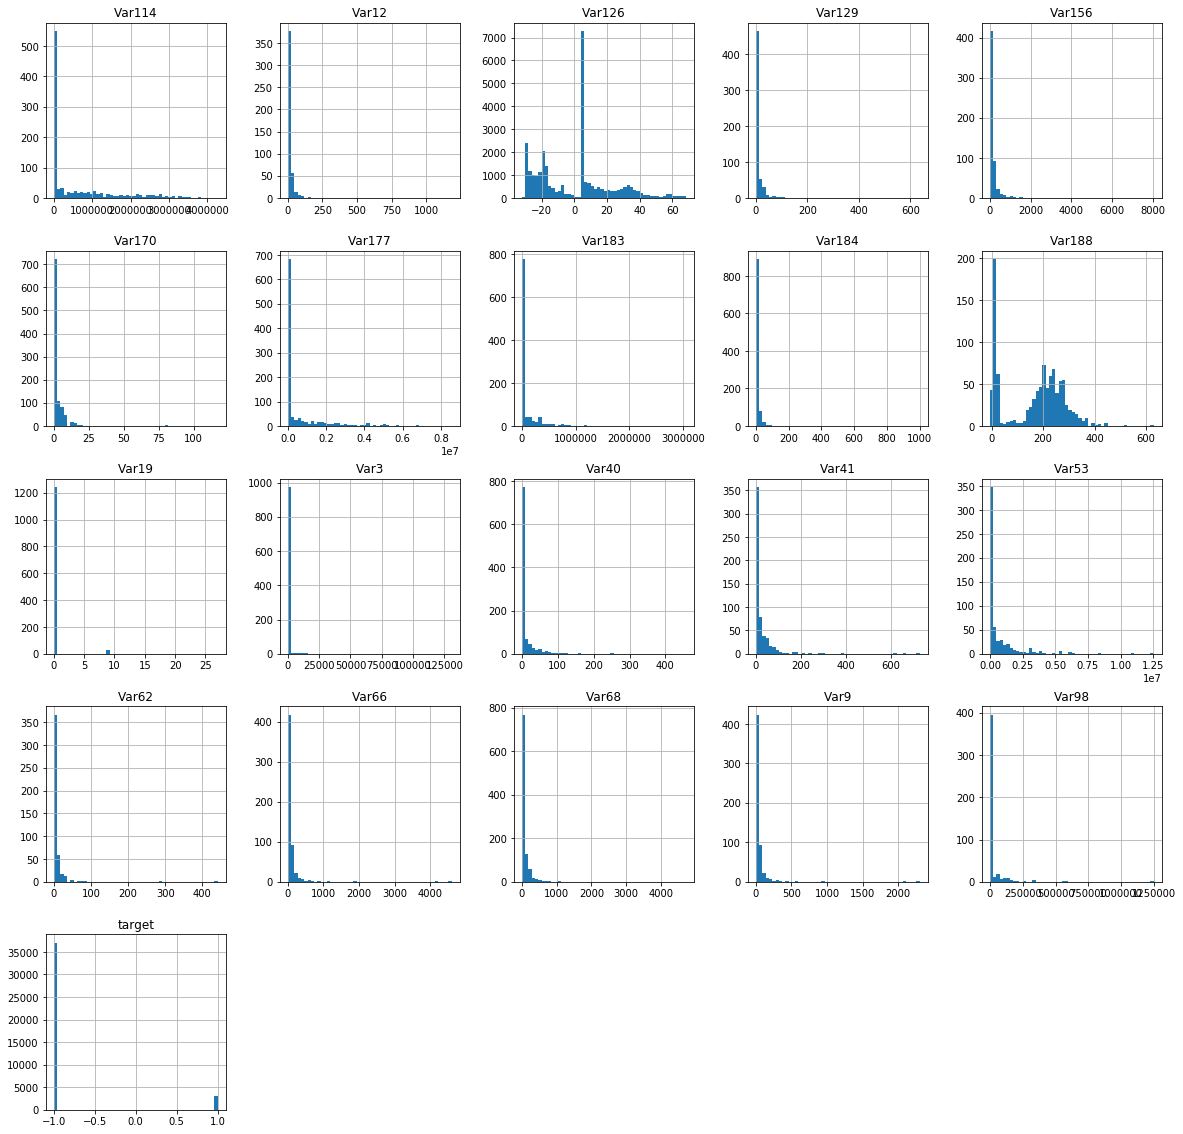

In [25]:
data_top_corr.hist(figsize=(20,20), bins=50)
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


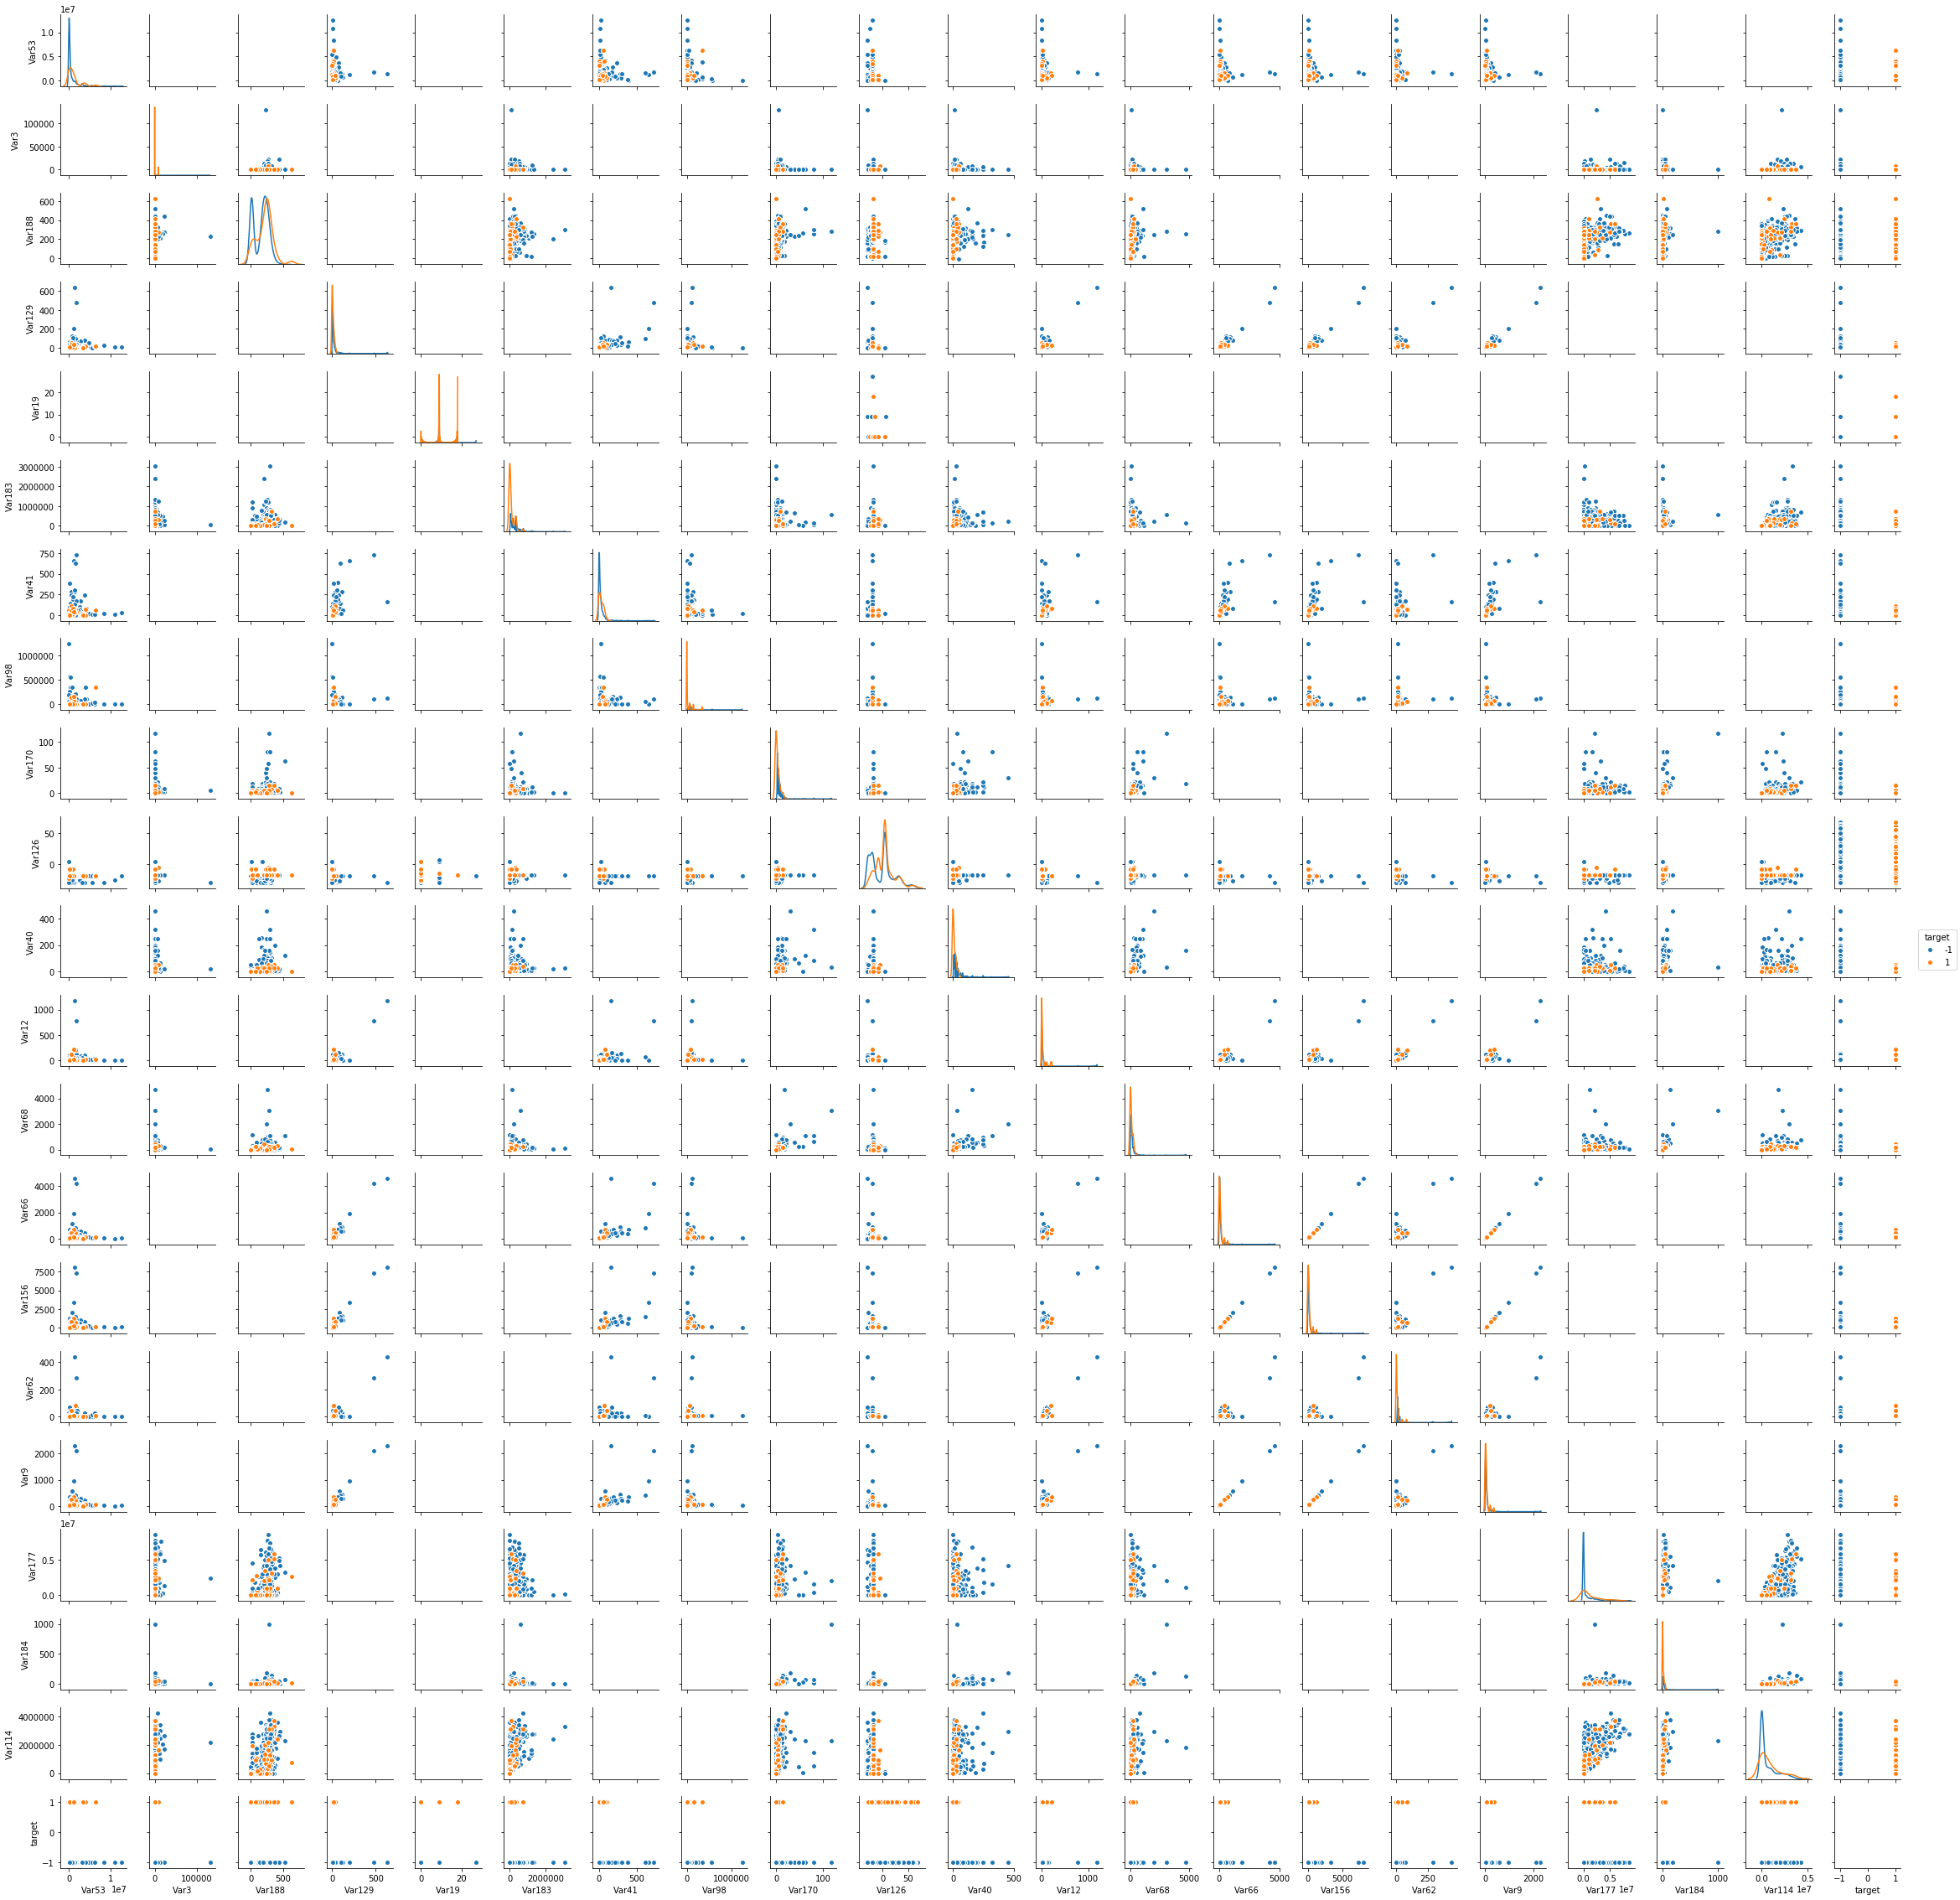

In [26]:
seaborn.pairplot(data_top_corr, hue="target", diag_kind="kde", size=1.5)
plt.show()

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [27]:
var_rand = ['Var23', 'Var33', 'Var43', 'Var53', 'Var63', 'Var73', 'Var83', 'Var93', 'Var103']
data_rand = pd.DataFrame(data_nomer['Var1'])
for i in var_rand:
    data_rand[str(i)] = data_nomer[str(i)]
data_rand['target'] = data_nomer['target']    

In [28]:
data_rand.keys()

Index(['Var1', 'Var23', 'Var33', 'Var43', 'Var53', 'Var63', 'Var73', 'Var83',
       'Var93', 'Var103', 'target'],
      dtype='object')

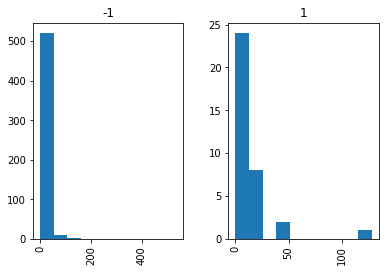

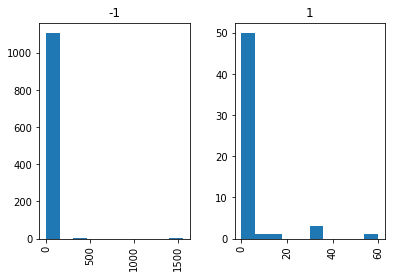

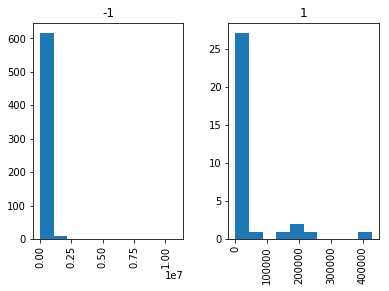

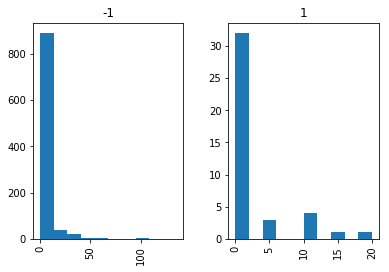

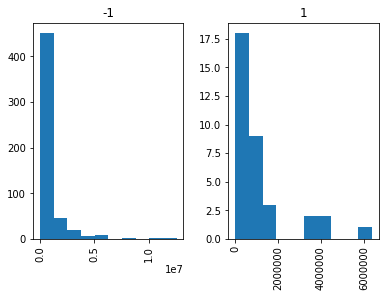

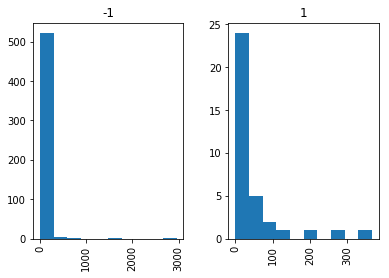

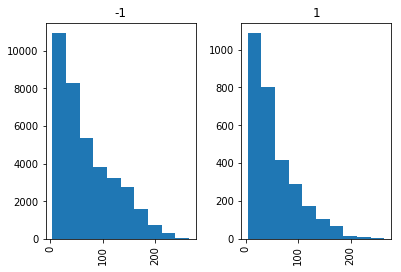

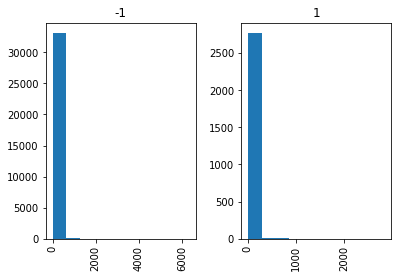

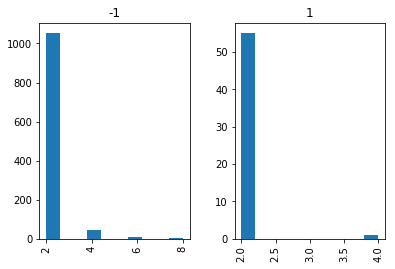

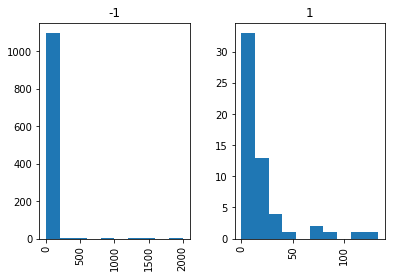

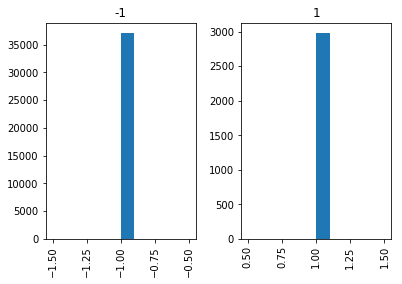

In [29]:
for i in data_rand.keys():
    data_rand[str(i)].hist(by=data_rand['target'])

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


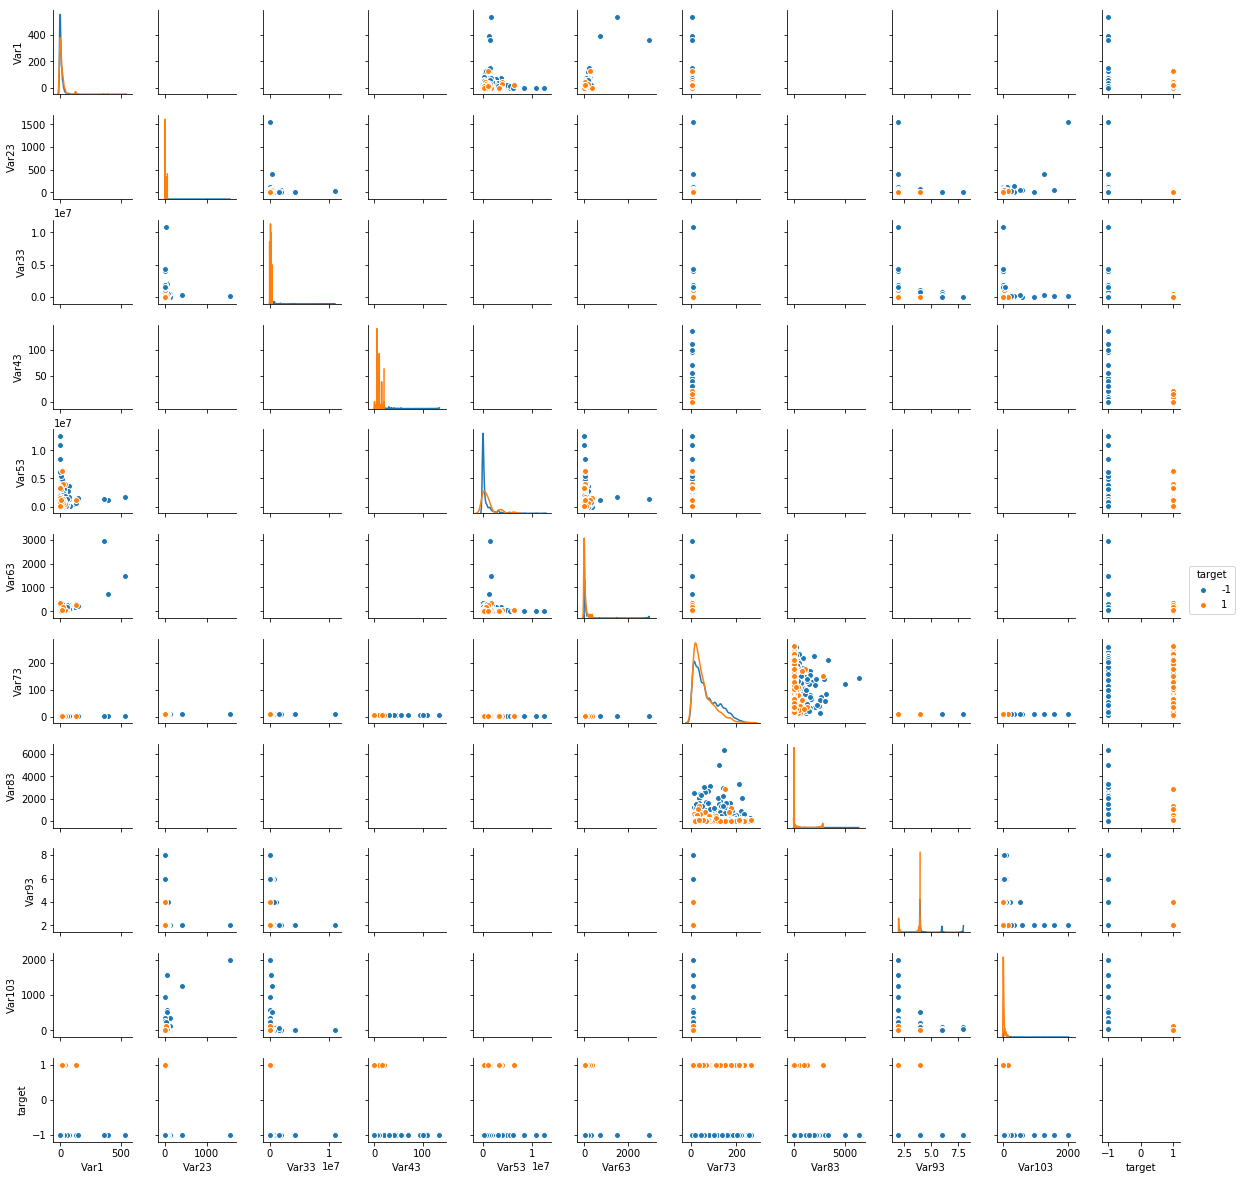

In [30]:
seaborn.pairplot(data_rand, hue="target", diag_kind="kde", size=1.5)
plt.show()

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [31]:
corr_min = data_correlation.sort_values(by = 'target', ascending = True)['target'][:10]

In [32]:
corr_min.keys()

Index(['Var189', 'Var74', 'Var92', 'Var7', 'Var168', 'Var13', 'Var140',
       'Var137', 'Var33', 'Var110'],
      dtype='object')

In [33]:
data_min = pd.DataFrame(data_nomer['Var189'])

for i in corr_min.keys()[1:]:
    data_min[str(i)] = data_nomer[str(i)]

data_min['target'] = data_nomer['target']

In [34]:
data_min.head(5)

,Var189,Var74,Var92,Var7,Var168,Var13,Var140,Var137,Var33,Var110,target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,276.0,0.0,NaN,7.0,NaN,636.0,205.0,NaN,NaN,NaN,-1
2,NaN,245.0,NaN,7.0,NaN,448.0,400.0,NaN,NaN,NaN,-1
3,NaN,0.0,NaN,7.0,NaN,4.0,5.0,NaN,NaN,NaN,1
4,NaN,0.0,NaN,7.0,NaN,0.0,225.0,NaN,NaN,NaN,-1


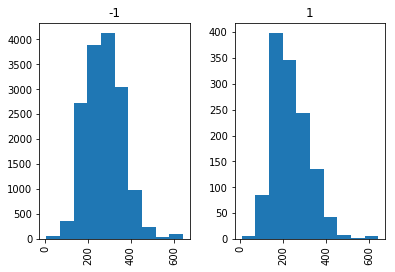

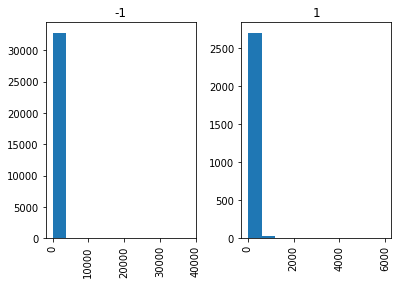

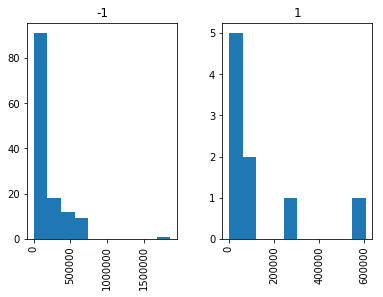

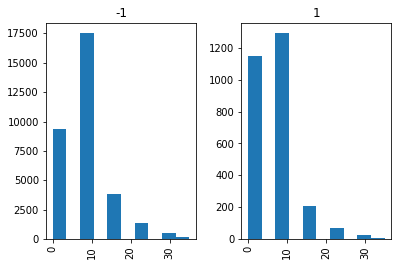

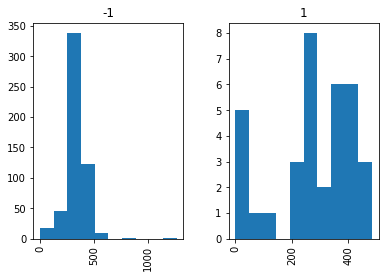

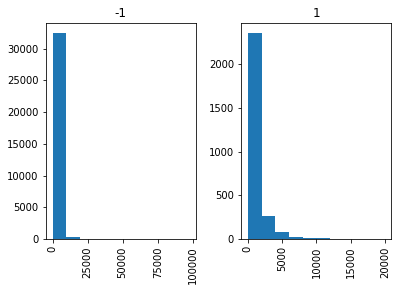

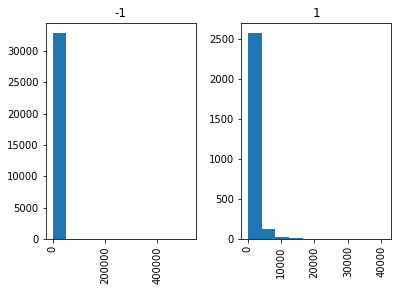

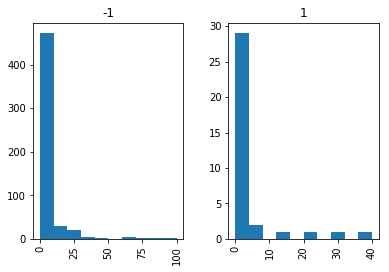

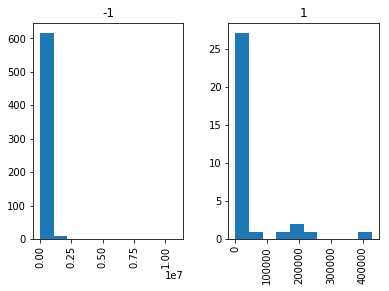

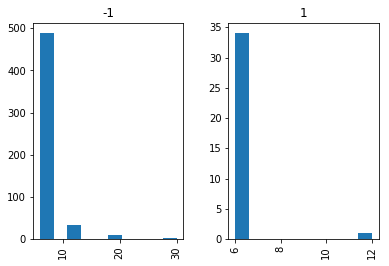

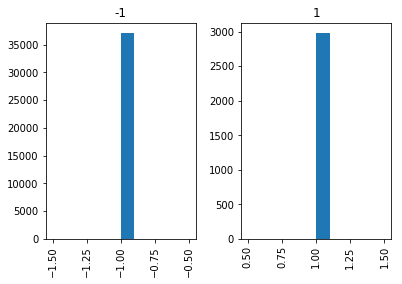

In [35]:
for i in data_min.keys():
    data_min[str(i)].hist(by=data['target'])

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


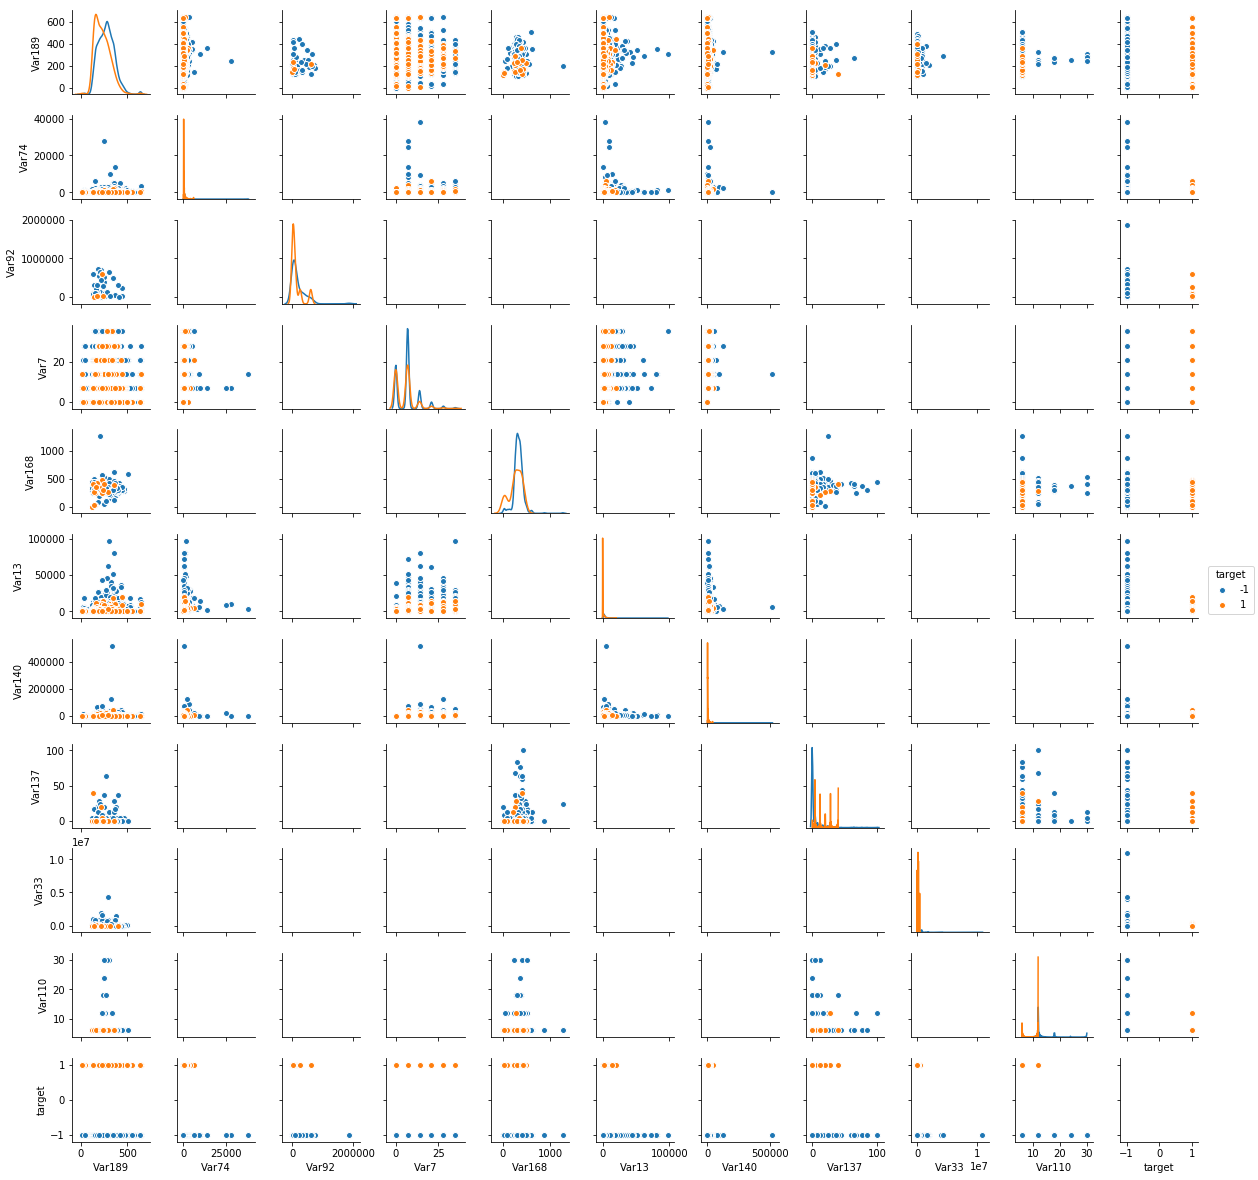

In [36]:
seaborn.pairplot(data_min, hue='target', diag_kind='kde', size=1.5)

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [37]:
list_cat = ["Var191", 'Var192', 'Var193', 'Var194', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199',
                     'Var200', 'Var201', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var209',
                       'Var210', 'Var211', 'Var212', 'Var213', 'Var214', 'Var215', 'Var216', 'Var217', 'Var218', 'Var219',
                       'Var220', 'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229',
                       'Var230']
data_cat = pd.DataFrame(data_full['Var191'])
for i in list_cat[1:]:
    data_cat[str(i)] = data_full[str(i)]
    
data_cat['target'] = data_full['target']
    
    

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


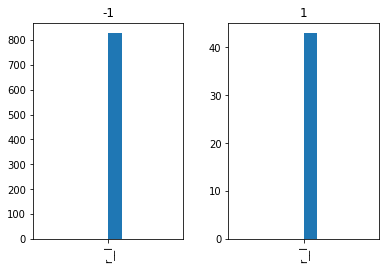

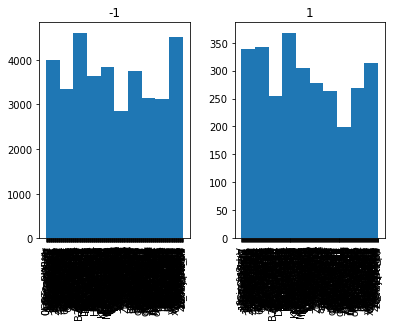

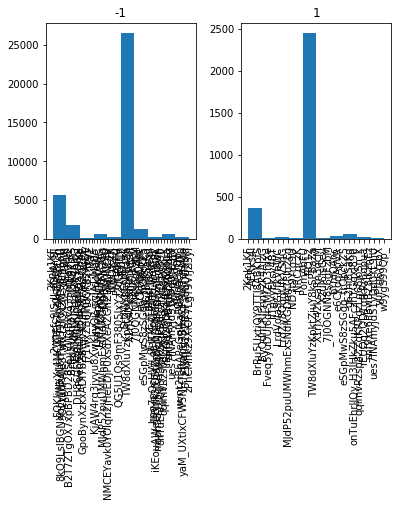

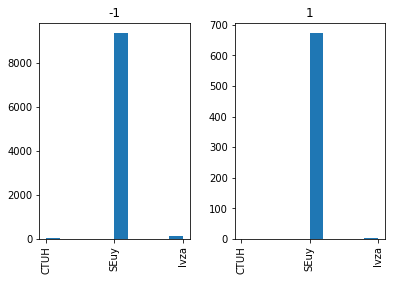

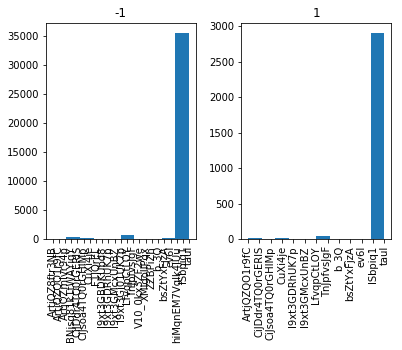

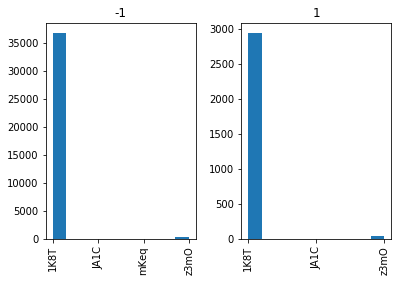

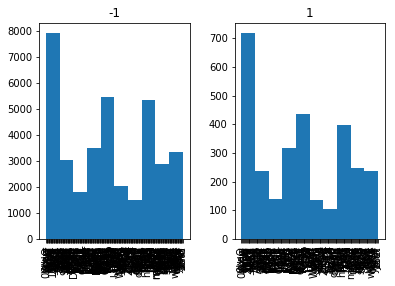

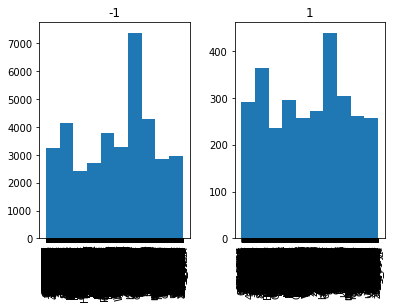

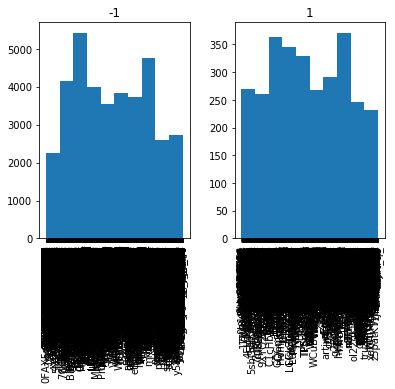

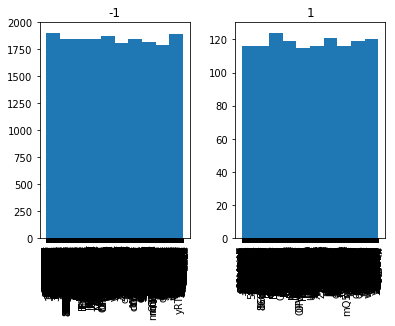

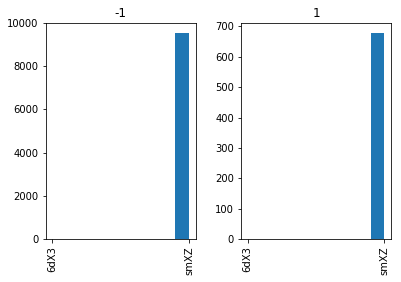

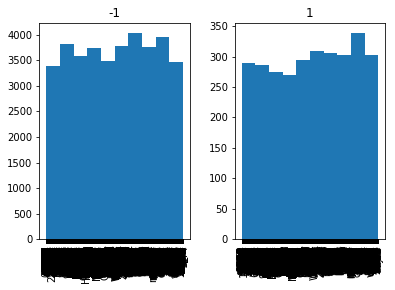

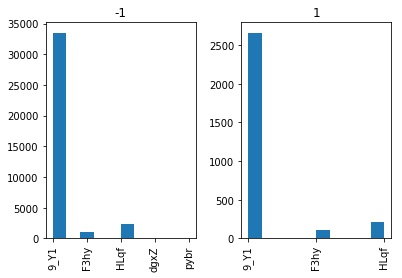

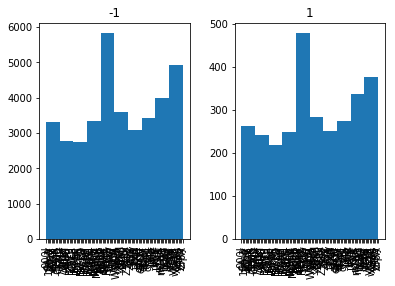

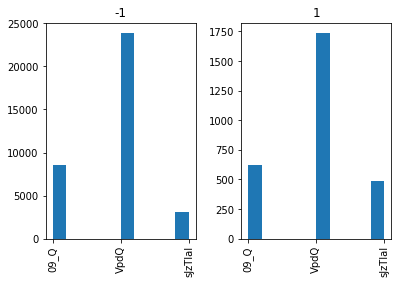

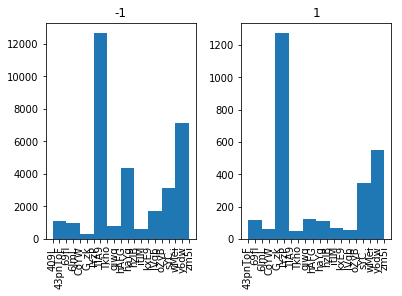

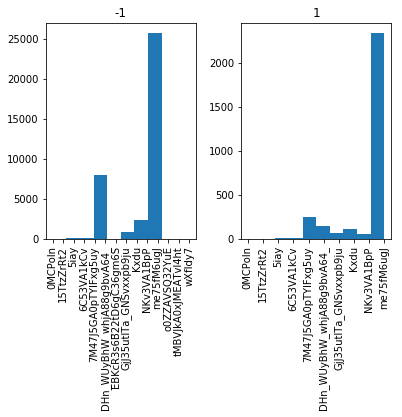

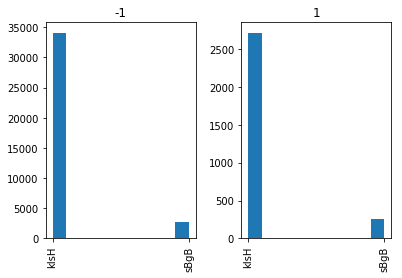

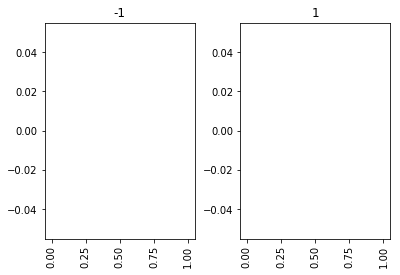

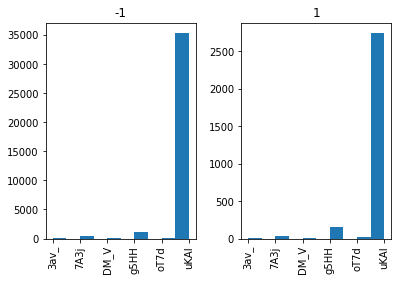

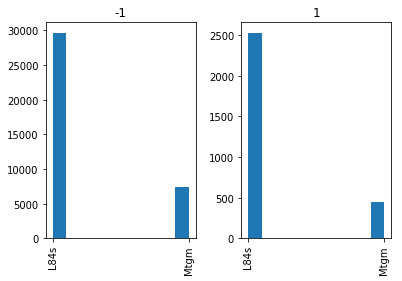

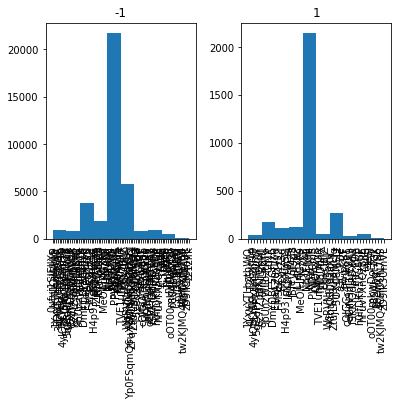

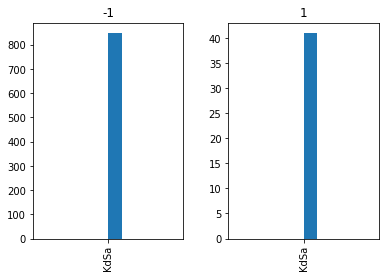

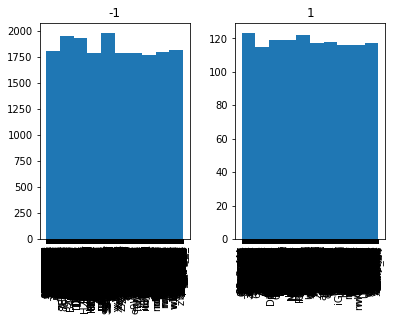

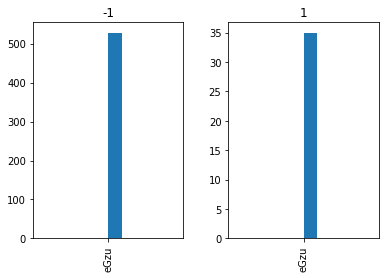

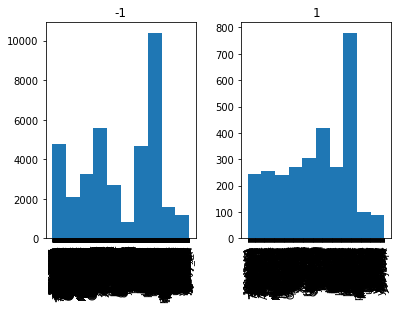

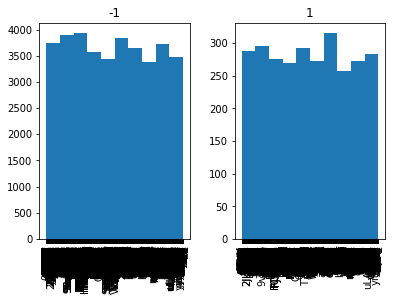

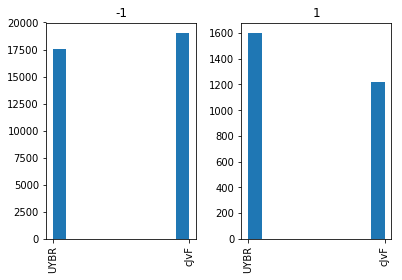

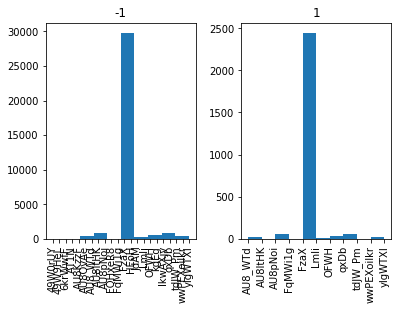

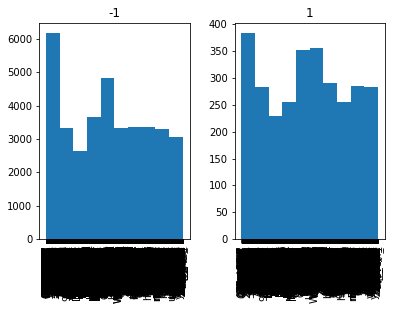

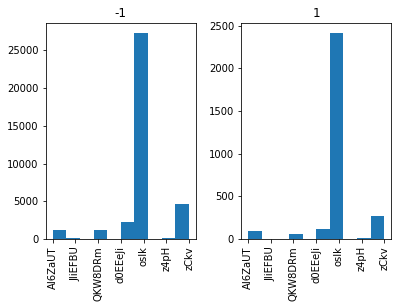

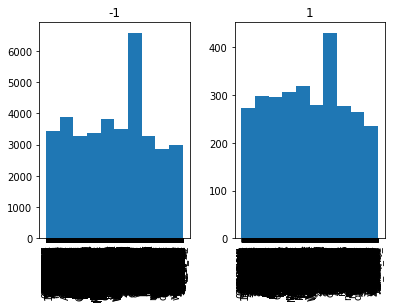

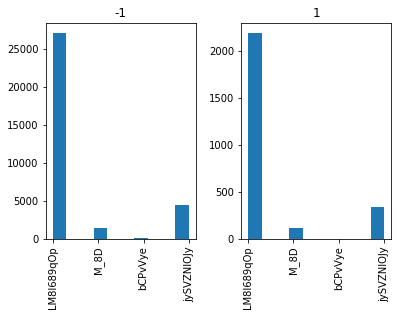

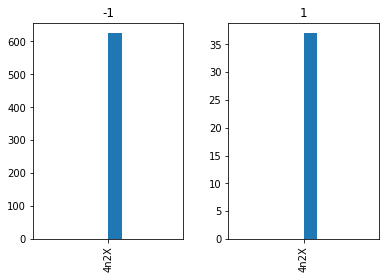

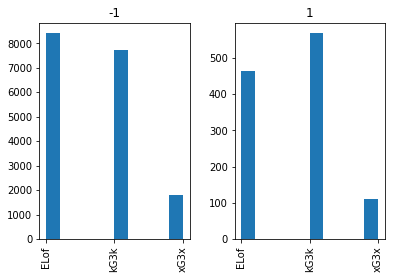

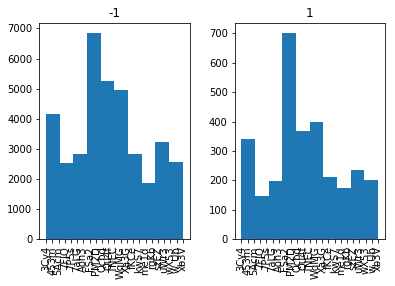

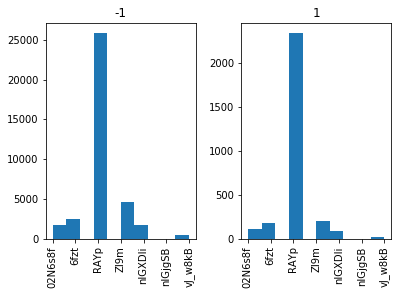

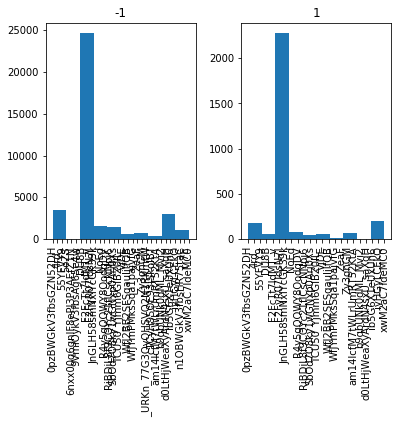

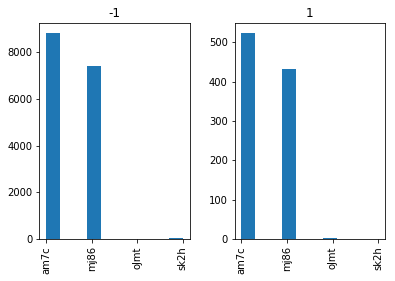

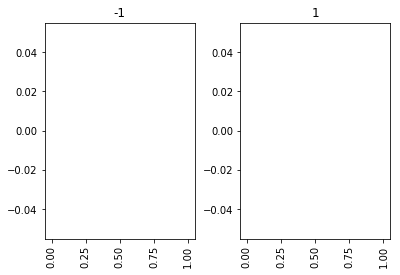

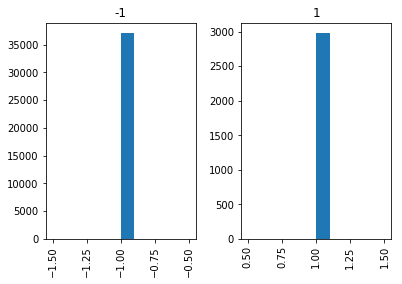

In [55]:
for i in data_cat.keys():
    data[str(i)].hist(by=data_cat['target'])

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Не малое кол-во признаков имеют достаточно серьезные выбросы, это затруднит работу
Наибольший вклад откажут категориальные данные, но и они далеки от идеала
Самыми шумовыми на первый взгялд кажутся числовые признаки
Отбор признаков по моему мнению необходим, он поможет избавиться от большого количпства шума